In [1]:
# Impact of a Professional Athlete on a Local Economy

# Research Questions: 
## What was the economic impact of the city of cleveland during the following years:
##  2003-2010 (Lebron in Cleveland, Finals in 2007)
##  2010-2014 (Lebron in Miami)
##  2014-2018 (Lebron back home with four trips to Championships, Championship 2016)

# Impact of Lebron playing in Cleveland on Restaurants, Retail Sales, Hotels, and Game Attendance.
# Target a state down to a zip code, break down data

# Bonus: How do events such as the Cleveland Indians, Browns, and Concerts affect data?


In [254]:
from config import census_api_key
from config import bls_api_key
from config import bea_api_key

import requests
import json
import prettytable
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


In [75]:
### Example for using API Census to pull data. It takes several parameters in. The first is the year, followed by a slew of variables.
### In this example we take the geographical location (from a zip code put in at the end of the URL)
### The number of people employed at that location, and the total payroll in that zipcode.
### Sales tax receipts 

url = f"https://api.census.gov/data/2007/zbp?get=GEO_TTL,EMP,NAICS_TTL,PAYANN&for=zipcode:44113&key={census_api_key}"

response = requests.get(url)
print(response.url)

https://api.census.gov/data/2007/zbp?get=GEO_TTL,EMP,NAICS_TTL,PAYANN&for=zipcode:44113&key=d38a2e9fb4b46b223a18e575c7275bbcbfad9482


In [76]:
data = response.json()
print(json.dumps(data, indent=4, sort_keys=True))

[
    [
        "GEO_TTL",
        "EMP",
        "NAICS_TTL",
        "PAYANN",
        "zipcode"
    ],
    [
        "Cleveland, OH",
        "23408",
        "Total",
        "1150388",
        "44113"
    ]
]


In [443]:
results = []

for year in range(2003, 2017):
    year = year
    for zipcode in range(44113, 44116):
        url = f"https://api.census.gov/data/{year}/zbp?get=EMP,ESTAB&for=zipcode:{zipcode}&key={census_api_key}"
        response = requests.get(url).json()
        if 'error' not in response:
            results.append([year, response[1][0], response[1][1], response[1][2]])

In [444]:
dataset = pd.DataFrame(results)

In [445]:
dataset.columns=["Year", "EMP", "ESTAB", "Zipcode"]
dataset

,Year,EMP,ESTAB,Zipcode
0,2003,23507,1480,44113
1,2003,46205,1623,44114
2,2003,35436,1045,44115
3,2004,22349,1460,44113
4,2004,45458,1662,44114
5,2004,35322,1029,44115
6,2005,23071,1462,44113
7,2005,54679,1617,44114
8,2005,38191,990,44115
9,2006,23551,1435,44113


In [448]:
# pd.to_numeric(dataset['EMP'], errors='coerce')
# dataset['EMP'].dtypes
# print (dataset['EMP'].dtypes)

dataset['EMP'] = dataset['EMP'].astype(int)

emp_stats = dataset.groupby('Year').agg(
    emp_sum = ('EMP', np.sum)
)

emp_stats

,emp_sum
Year,
2003,105148
2004,103129
2005,115941
2006,105540
2007,103332
2008,96302
2009,89720
2010,88716
2011,91182


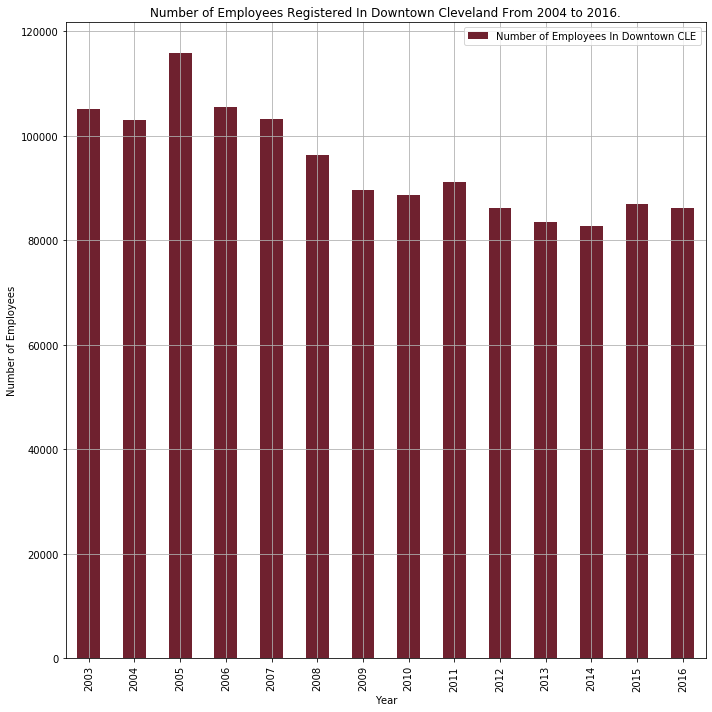

In [449]:
EMP_graph = emp_stats.plot(kind='bar', title="Number of Employees Registered In Downtown Cleveland From 2004 to 2016.", color="#6f212f", figsize=(10, 10), grid=True)
EMP_graph.set_xlabel("Year")
EMP_graph.set_ylabel("Number of Employees")

legend = ["Number of Employees In Downtown CLE"]
plt.legend(legend, loc="best")

plt.tight_layout()

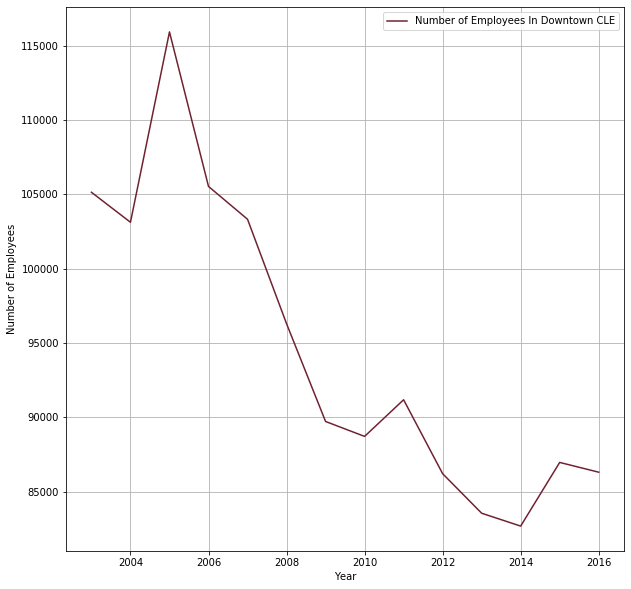

In [450]:
time_series = emp_stats.plot(kind="line", grid=True, color="#6f212f", figsize=(10, 10))
time_series.set_xlabel("Year")
time_series.set_ylabel("Number of Employees")

legend = ["Number of Employees In Downtown CLE"]
plt.legend(legend, loc="best")

In [451]:
dataset['ESTAB'] = dataset['ESTAB'].astype(int)

estab_stats = dataset.groupby('Year').agg(
    ESTAB_sum = ('ESTAB', np.sum)
)
estab_stats

,ESTAB_sum
Year,
2003,4148
2004,4151
2005,4069
2006,3974
2007,3876
2008,3771
2009,3683
2010,3644
2011,3623


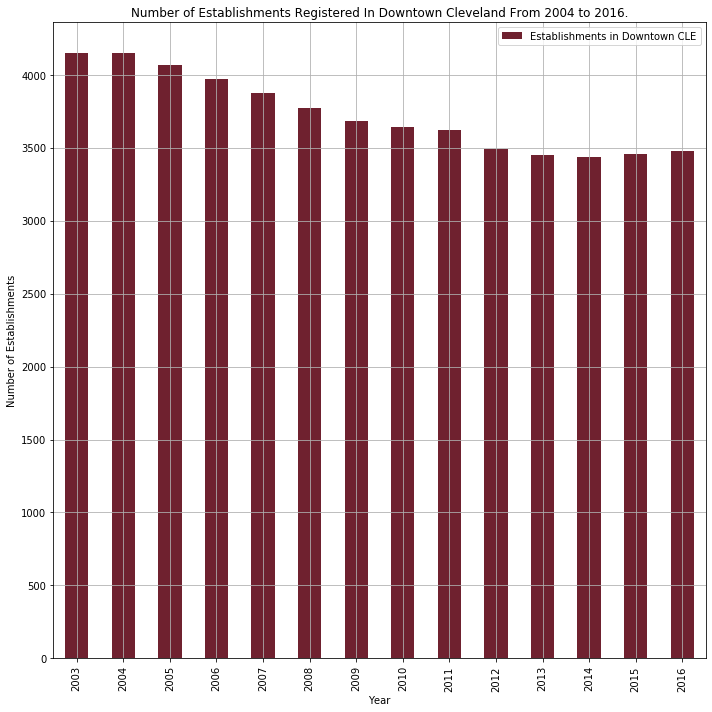

In [452]:
ESTAB_graph = estab_stats.plot(kind='bar', title="Number of Establishments Registered In Downtown Cleveland From 2004 to 2016.", color="#6f212f", figsize=(10, 10), grid=True)

ESTAB_graph.set_xlabel("Year")
ESTAB_graph.set_ylabel("Number of Establishments")
legend = ["Establishments in Downtown CLE"]
plt.legend(legend, loc="best")

plt.tight_layout()

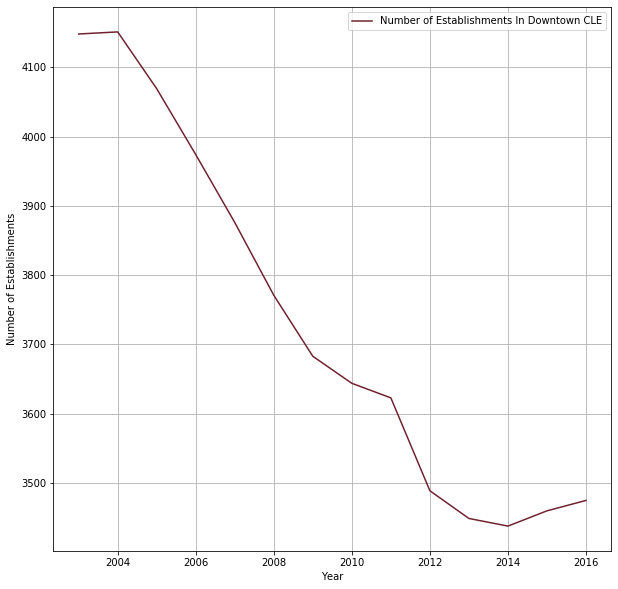

In [454]:
time_series = estab_stats.plot(kind="line", grid=True, color="#6f212f", figsize=(10, 10))
time_series.set_xlabel("Year")
time_series.set_ylabel("Number of Establishments")

legend = ["Number of Establishments In Downtown CLE"]
plt.legend(legend, loc="best")

In [455]:
results = []

for year in range(2003, 2017):
    year = year
    url = f"https://api.census.gov/data/{year}/zbp?get=EMP,ESTAB&for=zipcode:44115&key={census_api_key}"
    response = requests.get(url).json()
    if 'error' not in response:
         results.append([year, response[1][0], response[1][1]])

In [456]:
downtown_dataset = pd.DataFrame(results)
downtown_dataset.columns=["Year", "EMP", "ESTAB"]

downtown_dataset

,Year,EMP,ESTAB
0,2003,35436,1045
1,2004,35322,1029
2,2005,38191,990
3,2006,38821,950
4,2007,36572,921
5,2008,33963,890
6,2009,32770,864
7,2010,33074,857
8,2011,32793,840
9,2012,29826,782


In [457]:
downtown_dataset['EMP'] = downtown_dataset['EMP'].astype(int)

emp_stats = dataset.groupby('Year').agg(
    emp_sum = ('EMP', np.sum)
)

emp_stats

,emp_sum
Year,
2003,105148
2004,103129
2005,115941
2006,105540
2007,103332
2008,96302
2009,89720
2010,88716
2011,91182


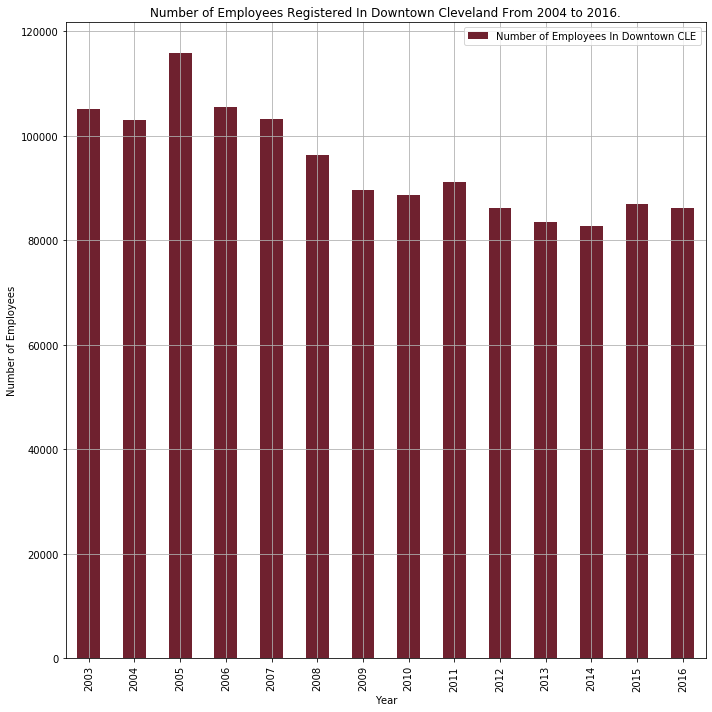

In [458]:
EMP_graph = emp_stats.plot(kind='bar', title="Number of Employees Registered In Downtown Cleveland From 2004 to 2016.", color="#6f212f", figsize=(10, 10), grid=True)
EMP_graph.set_xlabel("Year")
EMP_graph.set_ylabel("Number of Employees")

legend = ["Number of Employees In Downtown CLE"]
plt.legend(legend, loc="best")

plt.tight_layout()

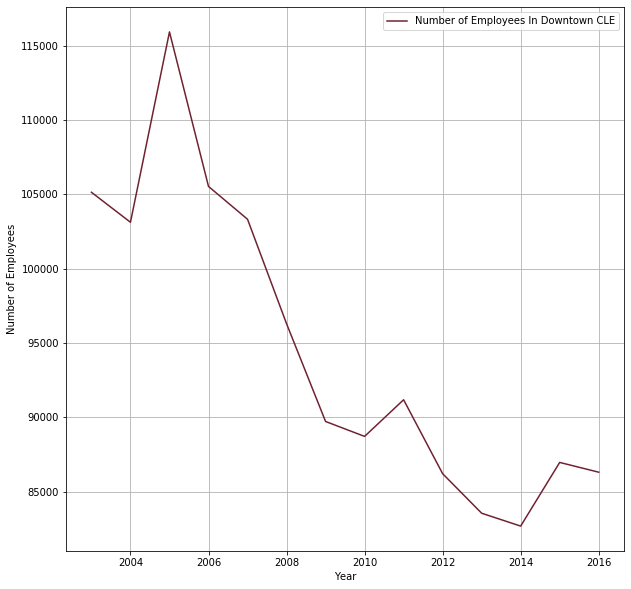

In [459]:
time_series = emp_stats.plot(kind="line", grid=True, color="#6f212f", figsize=(10, 10))
time_series.set_xlabel("Year")
time_series.set_ylabel("Number of Employees")

legend = ["Number of Employees In Downtown CLE"]
plt.legend(legend, loc="best")

In [460]:
downtown_dataset['ESTAB'] = downtown_dataset['ESTAB'].astype(int)

estab_stats = dataset.groupby('Year').agg(
    ESTAB_sum = ('ESTAB', np.sum)
)
estab_stats

,ESTAB_sum
Year,
2003,4148
2004,4151
2005,4069
2006,3974
2007,3876
2008,3771
2009,3683
2010,3644
2011,3623


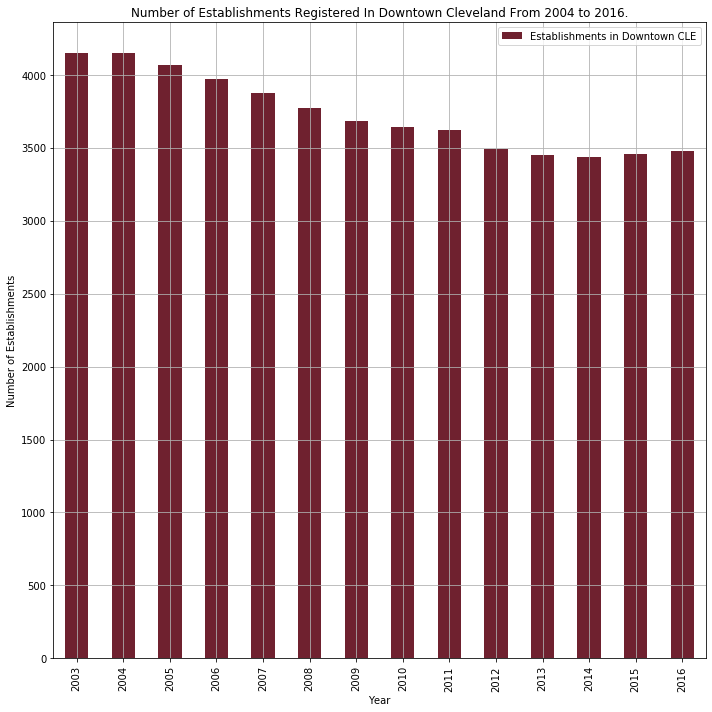

In [461]:
ESTAB_graph = estab_stats.plot(kind='bar', title="Number of Establishments Registered In Downtown Cleveland From 2004 to 2016.", color="#6f212f", figsize=(10, 10), grid=True)

ESTAB_graph.set_xlabel("Year")
ESTAB_graph.set_ylabel("Number of Establishments")
legend = ["Establishments in Downtown CLE"]
plt.legend(legend, loc="best")

plt.tight_layout()

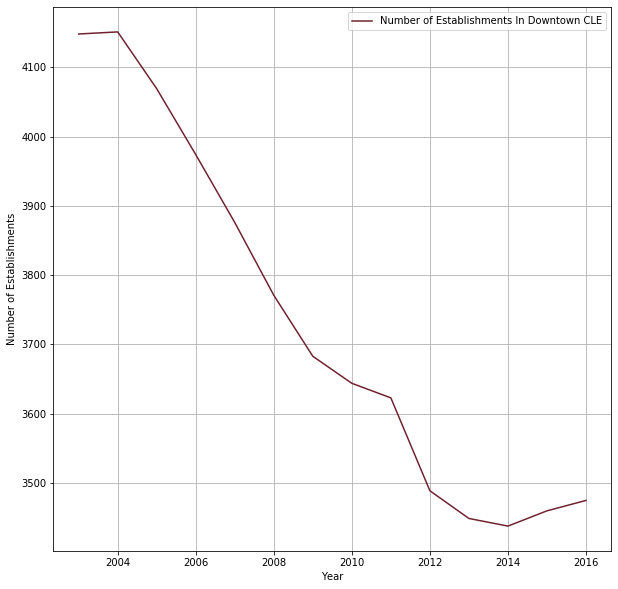

In [462]:
time_series = estab_stats.plot(kind="line", grid=True, color="#6f212f", figsize=(10, 10))
time_series.set_xlabel("Year")
time_series.set_ylabel("Number of Establishments")

legend = ["Number of Establishments In Downtown CLE"]
plt.legend(legend, loc="best")